In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_val_metric(df, by, target):
    best_by_iter = df.apply(lambda x: x.loc[x[by].idxmin(), [target]])
    return np.mean(best_by_iter[target])

def get_oracle_perf(df, targets):
    iter_gr = df.groupby(['iter_id'], as_index=False)
    return [get_val_metric(iter_gr, f'{target}_val', f'{target}_test') for target in targets]

def parse_est_name(name):
    name = name.upper()
    if name == 'IPSWS':
        return 'IPSW'
    elif name == 'DRS':
        return 'DR'
    elif name == 'DMLS':
        return 'DML'
    else:
        return name
    
def parse_base_name(name):
    name = name.upper()
    if name == 'MLP':
        return 'NN'
    else:
        return name

In [8]:
def plot_oracle(ds, targets, estmators, base_learners, ax=None, legend=False, s=40):
    oracle_perfs = []
    for est in estmators:
        if est == 'cf':
            df_test = pd.read_csv(f'../results/metrics_val/{ds}/{est}/{est}_test_metrics.csv')
            df_val = pd.read_csv(f'../results/metrics_val/{ds}/{est}/{est}_val_metrics.csv')
            df_val_gr = df_val.groupby(['iter_id', 'param_id'], as_index=False).mean().drop(columns=['fold_id'])
            df_base = df_val_gr.merge(df_test, on=['iter_id', 'param_id'], suffixes=['_val', '_test'])

            oracle_perf = get_oracle_perf(df_base, targets)
            oracle_perfs.append([parse_est_name(est), None, *oracle_perf])
        else:
            for bl in base_learners:
                model_name = f'{est}_{bl}'

                try:
                    df_test = pd.read_csv(f'../results/metrics_val/{ds}/{model_name}/{model_name}_test_metrics.csv')
                    df_val = pd.read_csv(f'../results/metrics_val/{ds}/{model_name}/{model_name}_val_metrics.csv')
                    df_val_gr = df_val.groupby(['iter_id', 'param_id'], as_index=False).mean().drop(columns=['fold_id'])
                    df_base = df_val_gr.merge(df_test, on=['iter_id', 'param_id'], suffixes=['_val', '_test'])
                except:
                    continue

                oracle_perf = get_oracle_perf(df_base, targets)
                oracle_perfs.append([parse_est_name(est), parse_base_name(bl), *oracle_perf])

    cols = ['estimator', 'base learner', *targets]
    df = pd.DataFrame(oracle_perfs, columns=cols)
    if ax:
        sns.scatterplot(data=df, x=targets[0], y=targets[1], hue='estimator', style='base learner', legend=legend, ax=ax, s=s)
    else:
        sns.scatterplot(data=df, x=targets[0], y=targets[1], hue='estimator', style='base learner', legend=legend, s=s)

## All

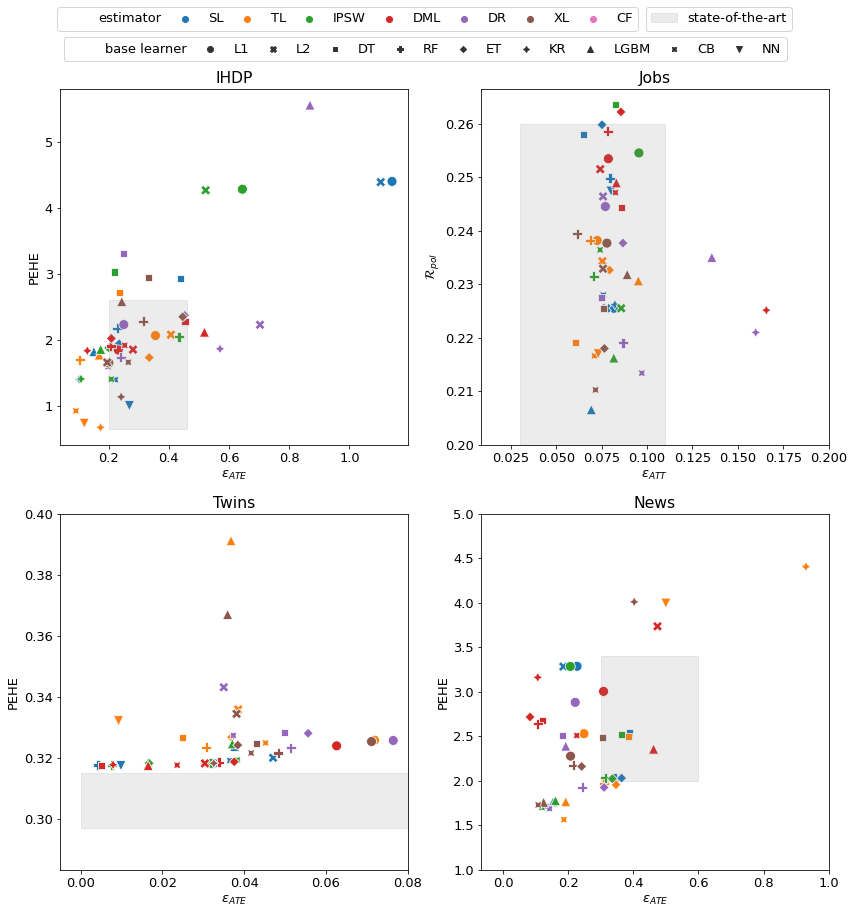

In [10]:
estmators = ['sl', 'tl', 'ipsws', 'dmls', 'drs', 'xl', 'cf']
base_learners = ['l1', 'l2', 'dt', 'rf', 'et', 'kr', 'lgbm', 'cb', 'mlp']

p_size = 100
sota_color = 'grey'
sota_alpha = 0.15

plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0][0]
ds = 'ihdp'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('IHDP')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.2, 0.46], 0.656, 2.6, alpha=sota_alpha, color=sota_color)

ax = axs[0][1]
ds = 'jobs'
targets = ['att', 'policy']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('Jobs')
ax.set_xlabel('$\epsilon_{ATT}$')
ax.set_ylabel('$\mathcal{R}_{pol}$')
#ax.set_xlim(right=0.09)
ax.set_xlim(right=0.2)
ax.set_ylim(bottom=0.2)
ax.fill_between([0.03, 0.11], 0.14, 0.26, alpha=sota_alpha, color=sota_color)

ax = axs[1][0]
ds = 'twins'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('Twins')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.0, 0.1], 0.297, 0.315, alpha=sota_alpha, color=sota_color)
ax.set_xlim(right=0.08)
ax.set_ylim(top=0.4)

ax = axs[1][1]
ds = 'news'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, 'full', s=p_size)
ax.set_title('News')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.set_ylim(1.0, 5.0)
ax.set_xlim(right=1.0)
sota_obj = ax.fill_between([0.3, 0.6], 2.0, 3.4, alpha=sota_alpha, color=sota_color)


lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lines1 = lines[:8]
lines2 = lines[8:]
labels1 = labels[:8]
labels2 = labels[8:]

fig.legend(lines1, labels1, loc='upper center', ncol=len(labels1), bbox_to_anchor=(0.41, 1.065), columnspacing=0.8)
fig.legend(lines2, labels2, loc='upper center', ncol=len(labels2), bbox_to_anchor=(0.5, 1.03), columnspacing=0.8)
fig.legend([sota_obj], ['state-of-the-art'], loc='upper center', bbox_to_anchor=(0.84, 1.065))

plt.tight_layout()
plt.savefig('ce_bl_all.pdf', dpi=1000, bbox_inches="tight")

## Focus

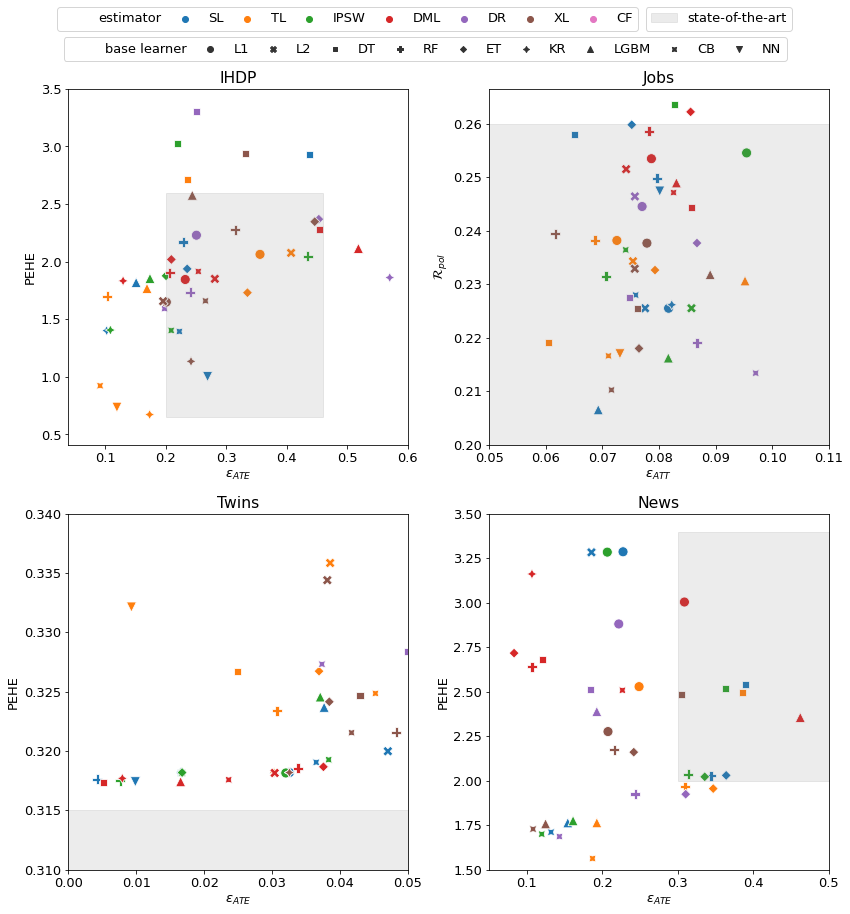

In [12]:
estmators = ['sl', 'tl', 'ipsws', 'dmls', 'drs', 'xl', 'cf']
base_learners = ['l1', 'l2', 'dt', 'rf', 'et', 'kr', 'lgbm', 'cb', 'mlp']

p_size = 100
sota_color = 'grey'
sota_alpha = 0.15

plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0][0]
ds = 'ihdp'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('IHDP')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.2, 0.46], 0.656, 2.6, alpha=sota_alpha, color=sota_color)
ax.set_xlim(right=0.6)
ax.set_ylim(top=3.5)

ax = axs[0][1]
ds = 'jobs'
targets = ['att', 'policy']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('Jobs')
ax.set_xlabel('$\epsilon_{ATT}$')
ax.set_ylabel('$\mathcal{R}_{pol}$')
#ax.set_xlim(right=0.09)
ax.set_xlim(0.05, 0.11)
ax.set_ylim(bottom=0.2)
ax.fill_between([0.03, 0.11], 0.14, 0.26, alpha=sota_alpha, color=sota_color)

ax = axs[1][0]
ds = 'twins'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, s=p_size)
ax.set_title('Twins')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.0, 0.1], 0.297, 0.315, alpha=sota_alpha, color=sota_color)
ax.set_xlim(0.0, 0.05)
ax.set_ylim(0.31, 0.34)

ax = axs[1][1]
ds = 'news'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, 'full', s=p_size)
ax.set_title('News')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.set_ylim(1.5, 3.5)
ax.set_xlim(0.05, 0.5)
sota_obj = ax.fill_between([0.3, 0.6], 2.0, 3.4, alpha=sota_alpha, color=sota_color)


lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lines1 = lines[:8]
lines2 = lines[8:]
labels1 = labels[:8]
labels2 = labels[8:]

fig.legend(lines1, labels1, loc='upper center', ncol=len(labels1), bbox_to_anchor=(0.41, 1.065), columnspacing=0.8)
fig.legend(lines2, labels2, loc='upper center', ncol=len(labels2), bbox_to_anchor=(0.5, 1.03), columnspacing=0.8)
fig.legend([sota_obj], ['state-of-the-art'], loc='upper center', bbox_to_anchor=(0.84, 1.065))

plt.tight_layout()
plt.savefig('ce_bl_focus.pdf', dpi=1000, bbox_inches="tight")

## IHDP and Jobs

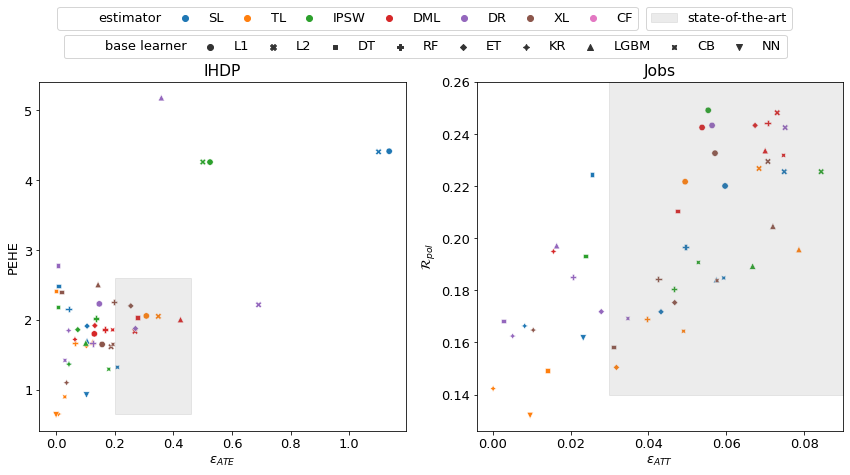

In [11]:
estmators = ['sl', 'tl', 'ipsws', 'dmls', 'drs', 'xl', 'cf']
base_learners = ['l1', 'l2', 'dt', 'rf', 'et', 'kr', 'lgbm', 'cb', 'mlp']

sota_color = 'grey'
sota_alpha = 0.15

plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
ds = 'ihdp'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax)
ax.set_title('IHDP')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.2, 0.46], 0.656, 2.6, alpha=sota_alpha, color=sota_color)

ax = axs[1]
ds = 'jobs'
targets = ['att', 'policy']

plot_oracle(ds, targets, estmators, base_learners, ax, 'full')
ax.set_title('Jobs')
ax.set_xlabel('$\epsilon_{ATT}$')
ax.set_ylabel('$\mathcal{R}_{pol}$')
ax.set_xlim(right=0.09)
ax.set_ylim(top=0.26)
sota_obj = ax.fill_between([0.03, 0.11], 0.14, 0.26, alpha=sota_alpha, color=sota_color)


lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lines1 = lines[:8]
lines2 = lines[8:]
labels1 = labels[:8]
labels2 = labels[8:]

fig.legend(lines1, labels1, loc='upper center', ncol=len(labels1), bbox_to_anchor=(0.41, 1.115), columnspacing=0.8)
fig.legend(lines2, labels2, loc='upper center', ncol=len(labels2), bbox_to_anchor=(0.5, 1.05), columnspacing=0.8)
fig.legend([sota_obj], ['state-of-the-art'], loc='upper center', bbox_to_anchor=(0.84, 1.115))

plt.tight_layout()
plt.savefig('est_ihdp_jobs.pdf', dpi=1000, bbox_inches="tight")

## Twins and News

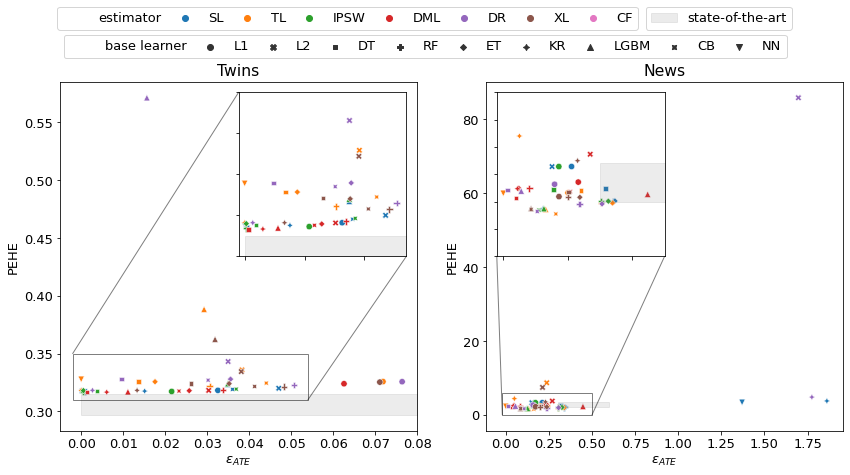

In [13]:
estmators = ['sl', 'tl', 'ipsws', 'dmls', 'drs', 'xl', 'cf']
base_learners = ['l1', 'l2', 'dt', 'rf', 'et', 'kr', 'lgbm', 'cb', 'mlp']

sota_color = 'grey'
sota_alpha = 0.15

plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
ds = 'twins'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax)
ax.set_title('Twins')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
ax.fill_between([0.0, 0.1], 0.297, 0.315, alpha=sota_alpha, color=sota_color)
ax.set_xlim(right=0.08)
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
plot_oracle(ds, targets, estmators, base_learners, axins)
axins.set_xlim(-0.002, 0.054)
axins.set_ylim(0.31, 0.35)
axins.fill_between([0.0, 0.1], 0.297, 0.315, alpha=sota_alpha, color=sota_color)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xlabel('')
axins.set_ylabel('')
ax.indicate_inset_zoom(axins, edgecolor="black")

ax = axs[1]
ds = 'news'
targets = ['ate', 'pehe']

plot_oracle(ds, targets, estmators, base_learners, ax, 'full')
ax.set_title('News')
ax.set_xlabel('$\epsilon_{ATE}$')
ax.set_ylabel('PEHE')
sota_obj = ax.fill_between([0.3, 0.6], 2.0, 3.4, alpha=sota_alpha, color=sota_color)
axins = ax.inset_axes([0.03, 0.5, 0.47, 0.47])
plot_oracle(ds, targets, estmators, base_learners, axins)
axins.set_xlim(-0.02, 0.5)
axins.set_ylim(0.0, 6.0)
axins.fill_between([0.3, 0.6], 2.0, 3.4, alpha=sota_alpha, color=sota_color)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xlabel('')
axins.set_ylabel('')
ax.indicate_inset_zoom(axins, edgecolor="black")


lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
lines1 = lines[:8]
lines2 = lines[8:]
labels1 = labels[:8]
labels2 = labels[8:]

fig.legend(lines1, labels1, loc='upper center', ncol=len(labels1), bbox_to_anchor=(0.41, 1.115), columnspacing=0.8)
fig.legend(lines2, labels2, loc='upper center', ncol=len(labels2), bbox_to_anchor=(0.5, 1.05), columnspacing=0.8)
fig.legend([sota_obj], ['state-of-the-art'], loc='upper center', bbox_to_anchor=(0.84, 1.115))

plt.tight_layout()
plt.savefig('est_twins_news.pdf', dpi=1000, bbox_inches="tight")